# BA4f: GridSearchCV, Regularization, and Visualization (Classification)

In this final module, we introduce hyperparameter tuning using `GridSearchCV` along with regularization (L1 and L2) for logistic regression.
We’ll also visualize decision boundaries to understand the impact of different regularization strengths.

### Step 1: Load predictors and class labels

In [2]:
import pandas as pd
X = pd.read_csv('predictors.csv')
y = pd.read_csv('classes.csv')['x']

### Step 2: Perform Grid Search for Logistic Regression using L2 (Ridge) regularization

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validated Accuracy: {grid.best_score_:.3f}')

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.756


### Step 3: Compare with L1 (Lasso) regularization using `liblinear` solver

In [4]:
param_grid_l1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear']
}
grid_l1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_l1, cv=5, scoring='accuracy')
grid_l1.fit(X, y)
print(f'Best Parameters (L1): {grid_l1.best_params_}')
print(f'Best Cross-Validated Accuracy (L1): {grid_l1.best_score_:.3f}')

Best Parameters (L1): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy (L1): 0.731


### Step 4: Visualize decision boundary of best model

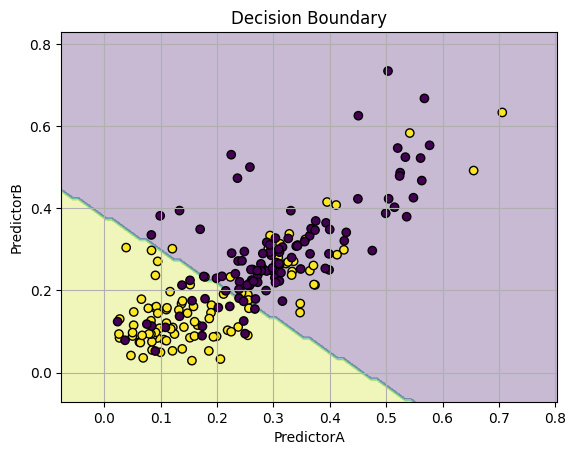

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundary(model, X, y):
    h = 0.01
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z_input = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = model.predict(Z_input)
    Z = pd.Series(Z).astype('category').cat.codes.values.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.astype('category').cat.codes, edgecolor='k')
    plt.xlabel('PredictorA')
    plt.ylabel('PredictorB')
    plt.title('Decision Boundary')
    plt.grid(True)
    plt.show()

# Fit model again for boundary plotting
best_model = grid.best_estimator_
plot_decision_boundary(best_model, X, y)


### Step 5: Try these

- Use `StandardScaler` before fitting regularized models to standardize features.
- Try using `RepeatedStratifiedKFold` for more robust validation.
- Visualize decision boundaries for different values of `C`.
- Use `RandomizedSearchCV` for faster hyperparameter tuning.
- Compare results with other classifiers like `SVC` or `RandomForestClassifier`.